In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df = pd.read_csv("D:\\Training\\001-RB Data Science\\006_KMeans\\food.csv")
df.shape

(25, 10)

In [16]:
df.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [19]:
df_x=df.iloc[:,1:11]
df_x.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
0,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_x)
df_x = scaler.transform(df_x)

df_x

array([[ 0.08294065, -1.79475017, -2.22458425, -1.1795703 , -1.22503282,
         0.9348045 , -2.29596509,  1.24796771, -1.37825141],
       [-0.28297397,  1.68644628,  1.24562107,  0.40046785, -0.6551106 ,
        -0.39505069, -0.42221774, -0.91079027,  0.09278868],
       [ 1.11969872,  0.38790475,  1.06297868,  0.05573225,  0.06479116,
        -0.5252463 ,  0.88940541, -0.49959828, -0.07694671],
       [-0.6183957 , -0.52383718, -1.22005113, -1.2657542 , -0.92507375,
         2.27395937, -1.98367386,  0.32278572,  0.03621022],
       [-0.03903089,  0.96810416, -0.12419682, -0.6624669 , -0.6851065 ,
         0.19082957,  0.45219769, -1.01358827, -0.07694671],
       [ 0.23540507,  0.8023329 ,  0.69769391,  1.13303099,  1.68457011,
        -0.96233157,  0.3272812 , -1.21918427, -0.98220215],
       [-0.43543839,  1.02336124,  0.69769391, -0.86356267,  0.33475432,
        -0.71124003,  1.38907137, -1.16778527, -0.30326057],
       [-0.10001666, -0.82775116, -0.21551801,  2.38269753,  0

In [23]:
kmeans = KMeans(n_clusters=3) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(df_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
#Checking cluster centers
kmeans.cluster_centers_

array([[ 0.51683795,  0.58810848,  0.59581802,  0.12078352, -0.62258302,
         0.36059227, -0.71890067, -0.22405072],
       [-0.53765145, -1.18961073, -0.9234126 , -0.97006761,  1.46798653,
        -0.77614779,  0.90530771, -0.54843392],
       [-1.13166513, -0.4209907 , -0.84919869,  1.00216323,  0.13270653,
        -0.18799932,  1.33791596,  1.66284109]])

In [24]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1,
       0, 1, 0])

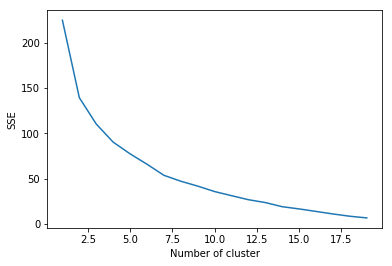

In [27]:
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_x)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [28]:
from sklearn.metrics import silhouette_score
for n_cluster in range(2, 8):
    kmeans = KMeans(n_clusters=n_cluster).fit(df_x)
    label = kmeans.labels_
    sil_coeff = silhouette_score(df_x, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.3271084145417136
For n_clusters=3, The Silhouette Coefficient is 0.3351693984160507
For n_clusters=4, The Silhouette Coefficient is 0.261786751460265
For n_clusters=5, The Silhouette Coefficient is 0.25877415617686955
For n_clusters=6, The Silhouette Coefficient is 0.25574724956125605
For n_clusters=7, The Silhouette Coefficient is 0.23667077260424618
